<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/Detec%C3%A7%C3%A3o_de_transa%C3%A7%C3%B5es_fraudulentas_em_cart%C3%B5es_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de transações fraudulentas em cartões de crédito

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*

<center><img width="80%" src="http://images.unsplash.com/photo-1563013544-824ae1b704d3?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>

<center>Photo by <a href="https://unsplash.com/@rupixen?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">rupixen.com</a> on <a href="https://unsplash.com/s/photos/money-transaction?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>
  
O problema de fraudes em cartões de crédito não é novo, e infelizmente tem aumentado significativamente durante a pandemia da COVID-19.

Para as instituições financeiras é importante **reconhecer as transações fraudulentas** afim de evitarem prejuízos. Por outro lado é importante também que os clientes não tenham transações comuns bloqueadas, por erro de classificação, gerando constrangimento e stress.

O investimento na área de detecção de fraudes através da Inteligência Artificial vem crescendo ano após ano, já que o prejuízo é considerável.

O desafio é aprimorar cada vez mais os algoritmos de **Machine Learning**, tendo em vista o grande volume de dados com base histórica, uma vez que um pequeno aumento no desempenho do modelo anterior pode gerar uma economia de milhões de reais.









>  Esse é um projeto completo de Machine Learning, que vai englobar as seguintes etapas:
* **coleta de dados**
* **limpeza dos dados**
* **exploração dos dados**
* **preparação dos dados**
* **modelos de machine learning**
* **avaliação do algoritmo**

Então, vamos lá!


## Obtenção dos Dados

Os dados utilizados nesse projeto foram obtidos do dataset [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) disponível do Kaggle, que contém dados de transações feitas com cartão de crédito por usuários europeus num período de 2 dias em setembro de 2013.

O dataset é extremamente **desbalanceado**, apresentando 492 transações fraudulentas de 284.807 transações totais, o que representa apenas 0,17% do total.

Outro detalhe que é importante ressaltar é que devido a questões de segurança e confidencialidade, não são disponibilizados os nomes originais das colunas nem muitos detalhes sobre os dados.
Por isto, todas as variáveis (colunas) receberam nomes de **V1 a V28**.

Por fim, as variáveis são todas numéricas, e essas citadas acima foram transformadas pela Análise de Componentes Principais (*Principal Component Analysis* - PCA), sendo as variáveis V1 a V28 os próprios componentes principais obtidos com a PCA.

## Análise Exploratória dos Dados

O primeiro passo é realizarmos a análise exploratória dos dados, afim de obtermos mais informações e conhecermos melhor os dados a serem trabalhados.


In [79]:
# importando as bibliotecas e pacotes necessários

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importando o arquivo creditcard.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

### Variáveis e entradas

Vamos verificar:
* o tamanho do dataframe

In [80]:
print("Entradas:  ", df.shape[0], "\nVariáveis: ", df.shape[1])

Entradas:   284807 
Variáveis:  31


* os nomes e tipos das variáveis (colunas)

In [81]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

* uma **lista das variáveis** e suas descrições

    *   `Time`: tempo em segundos entre cada transação e a primeira transação no dataset.
    *   `V1 a V28`: variáveis numéricas resultado da transformação pela PCA que por questões de privacidade não tem mais informações.
    *   `Amount`: valor da transação na moeda local (euros)
    *   `Class`: é a variável alvo, que recebe:
      * **0** -> para transação não fraudulenta e
      * **1** -> para transação fraudulenta.





* as primeiras entradas do dataframe

In [82]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Valores ausentes

Um dos passos mais importantes na fase de análise exploratória é obter a proporção de valores ausentes do dataset, uma vez que isso indica a qualidade do mesmo.

Para isso, vamos imprimir a proporção de valores ausentes em cada coluna, em ordem decrescente:


In [83]:
# imprimindo a proporção dos dados ausentes de cada coluna
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Conforme visto, o dataset não possui valores ausentes, o que indica ótima qualidade. Sendo assim, podemos dar continuidade a nossa análise exploratória sem a necessidade de passar por uma etapa de tratamento de dados ausentes.

### Resumo estatístico

Vamos imprimir o resumo estatístico:

In [84]:
# imprimindo o resumo estatístico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Conforme o resumo estatístico apresenta, a variável `Amount` apresenta valores baixos na maioria das transações, como era esperado. 

No geral, as variáveis não apresentam nenhum valor discrepante que necessite atenção no momento.

### Distribuição das variáveis

Vamos plotar um gráfico de barras para visualizar a distribuição das variáveis do dataset:


0    284315
1       492
Name: Class, dtype: int64


0.173 % das transações são fraudulentas




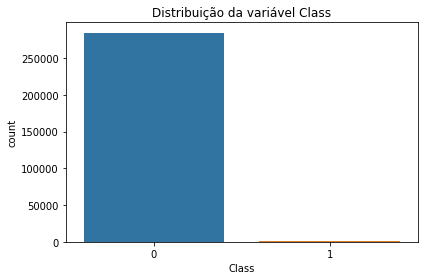

In [85]:
# ver balanceamento da variável Class
print(df.Class.value_counts())
print('\n')
print(round(((df.loc[df.Class == 1].shape[0])/(df.loc[df.Class == 0].shape[0])*100),4),'% das transações são fraudulentas')
print('\n')

#  imprimir countplot para visualização
fig, ax = plt.subplots()
sns.countplot(x=df.Class, ax=ax)
ax.set_title('Distribuição da variável Class')
plt.tight_layout()

O gráfico confirma o desbalanceamento do dataset, conforme apontado anteriormente, onde as transações fraudulentas representam apenas 0,17% do total.

Essa discrepância interfere no desempenho do modelo de machine learning e afim de evitar isto, será necessário balancear os dados. Mais adiante lidaremos com essa questão.

Vamos agora plotar histogramas para as duas variáveis `Time`e `Amount`:

* histograma do tempo entre cada transação e a primeira transação (em segundos)

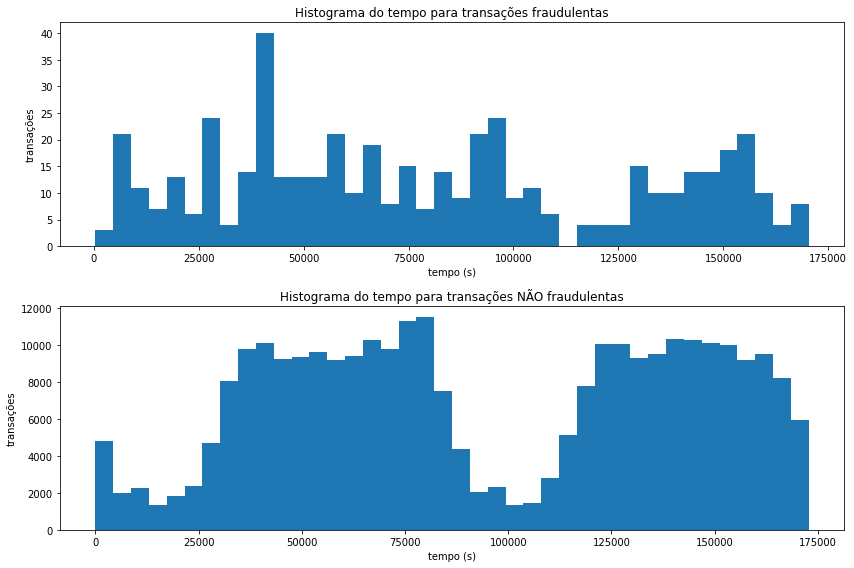

In [86]:
# histograma da variável Time para transações fraudulentas e não fraudulentas

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax1.hist(df.loc[df.Class==1, 'Time'], bins=40)
ax1.set_title("Histograma do tempo para transações fraudulentas")
ax1.set_ylabel("transações")
ax1.set_xlabel("tempo (s)")

ax2.hist(df.loc[df.Class==0, 'Time'], bins=40)
ax2.set_title("Histograma do tempo para transações NÃO fraudulentas")
ax2.set_ylabel("transações")
ax2.set_xlabel("tempo (s)")

plt.tight_layout()

Os histogramas nos mostram mais uma vez que a distribuição está desbalanceada, uma vez que a escala das transações fraudulentas (máximo de 40) é bem menor comparada a escala das transações não fraudulentas (máximo de 12000).



* histograma do valor da transação (em euros)

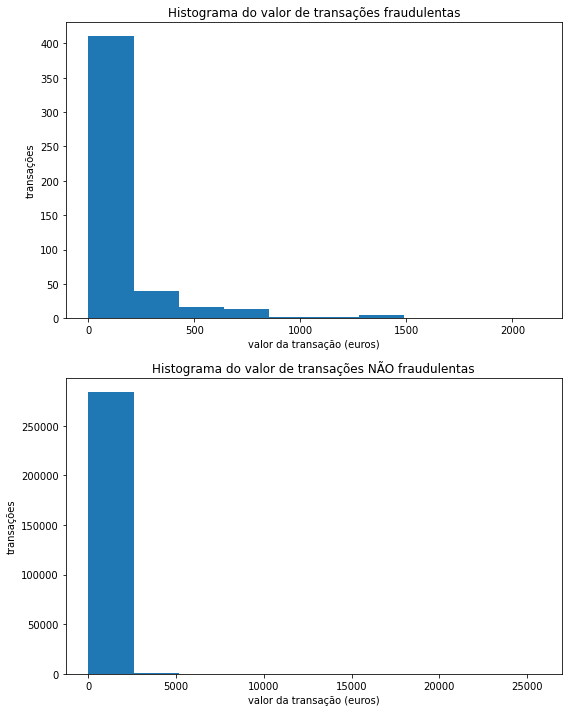

In [87]:
# histograma da variável Amount para transações fraudulentas e não fraudulentas

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax1.hist(df.loc[df.Class==1, 'Amount'], bins=10)
ax1.set_title("Histograma do valor de transações fraudulentas")
ax1.set_ylabel("transações")
ax1.set_xlabel("valor da transação (euros)")

ax2.hist(df.loc[df.Class==0, 'Amount'], bins=10)
ax2.set_title("Histograma do valor de transações NÃO fraudulentas")
ax2.set_ylabel("transações")
ax2.set_xlabel("valor da transação (euros)")

plt.tight_layout()

Os histogramas nos mostram a diferença nos valores das transações:

* O valor das transações fraudulentas, em sua maioria, não ultrapassam 250 euros. 

* Já o valor das transações não fraudulentas, em sua maioria, não ultrapassam 2500 euros.


Vamos visualizar agora a distribuição da variável `Amount` através de `boxplots` :

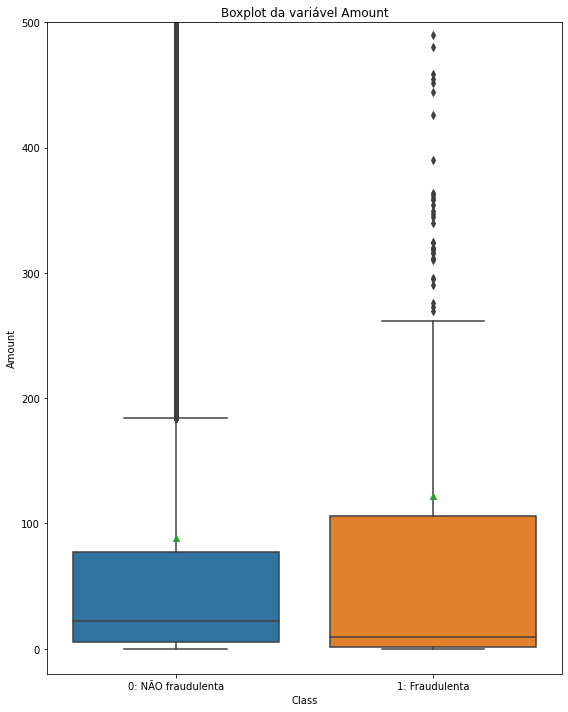

In [88]:
# boxplot da variável Amount para transações fraudulentas

fig,ax = plt.subplots(figsize=(8,10), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
ax.set_title("Boxplot da variável Amount")
plt.ylim(-20,500)
plt.xticks([0, 1], ['0: NÃO fraudulenta', '1: Fraudulenta'])
plt.tight_layout()

É possível perceber que as duas classes tem distribuições diferentes.

### Correlação entre variáveis

Neste momento procuramos avaliar a intensidade das relações entre duas variáveis, e isso é feito através do coeficiente de correlação.

Para isto, iremos criar uma matriz de correlação e gerar um *heatmap* a partir dessa matriz, para melhor visualização.

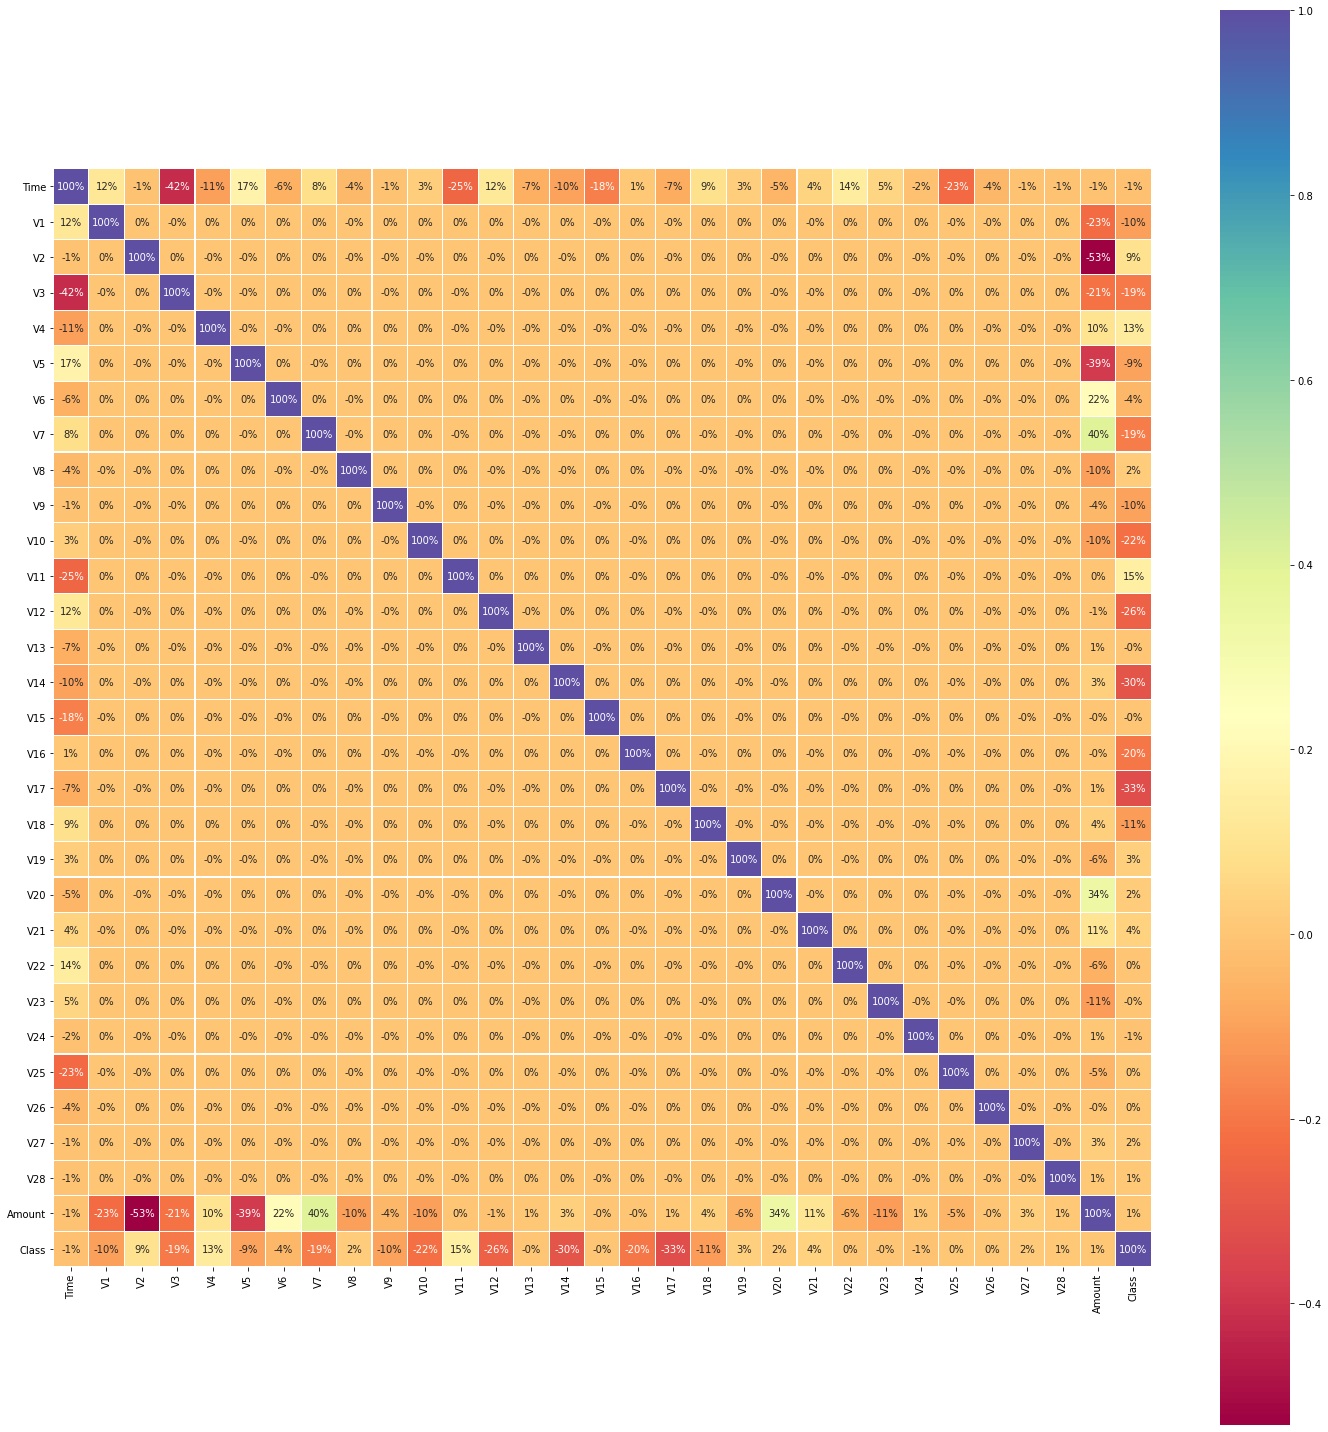

In [89]:
# criando uma matriz de correlação
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Spectral', fmt=".0%",linewidths=.1, square=True, annot=True)
plt.tight_layout()

A partir desse *heatmap* podemos perceber algumas relações entre as variáveis:

* As variáveis V1 a V28 não estão correlacionadas entre si, somente tem relação com as variáveis `Time`, `Amount` e `Class`;
* As variáveis `Time`, `Amount` e `Class` não tem correlação entre si;
* Das correlações positivas, podemos destacar as da variável `Amount` com `V7` e `V20`;
* Das correlações negativas, podemos destacar a da variável `Amount` com `V2` e `V5` e da variável `Time` com `V3`.

Porém a maioria das variáveis não possui relação com as outras, o que nos indica mais uma vez o desbalanceamento do dataset. Isso será tratado na etapa seguinte.


## Preparação dos dados

Daremos início agora à preparação dos dados para que possam ser usados no modelo de machine learning.

Essa é uma etapa muito importante, visto que a falta ou má preparação dos dados pode nos guiar a caminhos de insucesso com os modelos construídos.


In [90]:
# importando os pacotes do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler

Faremos os seguintes pré-processamentos dos dados:

* **padronização das colunas `Time` e `Amount`**

  Conforme visto anteriormente, as variáveis V1 a V28 já são resultado de uma transformação PCA e as únicas variáveis que precisamos padronizar são a `Time` e `Amount`.
  Faremos isso com o `StandardScaler`.


In [91]:
# padronizando as colunas Time e Amount
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled['scaled_Amount'] = scaler.fit_transform(df_scaled.Amount.values.reshape(-1,1))
df_scaled['scaled_Time'] = scaler.fit_transform(df_scaled.Time.values.reshape(-1,1))

df_scaled.drop(['Amount', 'Time'], axis=1, inplace=True)

df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


* **separação dos dados entre feature matrix e target vector**

  Separamos os dados em coluna alvo (y) e o restante do dataset sem a coluna alvo (X).
 

In [92]:
# separar os dados entre feature matrix e target vector
X= df_scaled.drop('Class', axis=1)
y= df_scaled.Class

* **divisão do dataset entre treino e teste**
  
  Dividimos o dataset em treino (X_train e y_train) e teste (X_test e y_test) com o `train_test_split`. Essa divisão nos permite treinar um conjunto de dados diferente dos que serão usados para testar o modelo. Por padrão, o conjunto de teste é igual a 25% do conjunto total, sendo o conjunto de treino 75%.
  
  Utilizamos o `shuffle` para garantir que os dados serão "embaralhados" antes da divisão e o `stratify` para manter a proporção de valores categóricos y.




In [93]:
# dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

* **balanceamento dos dados**

  Conforme verificado anteriormente, precisamos balancear os dados para que o modelo seja realmente eficaz. Com os dados desbalanceados, o modelo pode ter uma alta acurácia porém não ser eficaz.
  Usamos o `RandomUnderSampler` e vamos plotar novo gráfico de barras para visualizar esse balanceamento.

1    369
0    369
dtype: int64


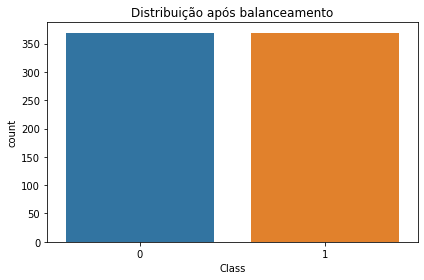

In [94]:
# balanceamento dos dados com under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver dataset balanceado e imprimir novo countplot para a variável Class
print(pd.Series(y_rus).value_counts())

fig, ax = plt.subplots()
sns.countplot(y_rus)
ax.set_title('Distribuição após balanceamento')
ax.set_xlabel('Class')
plt.tight_layout()



Por fim, vamos plotar uma nova matriz de correlação entre as variáveis.

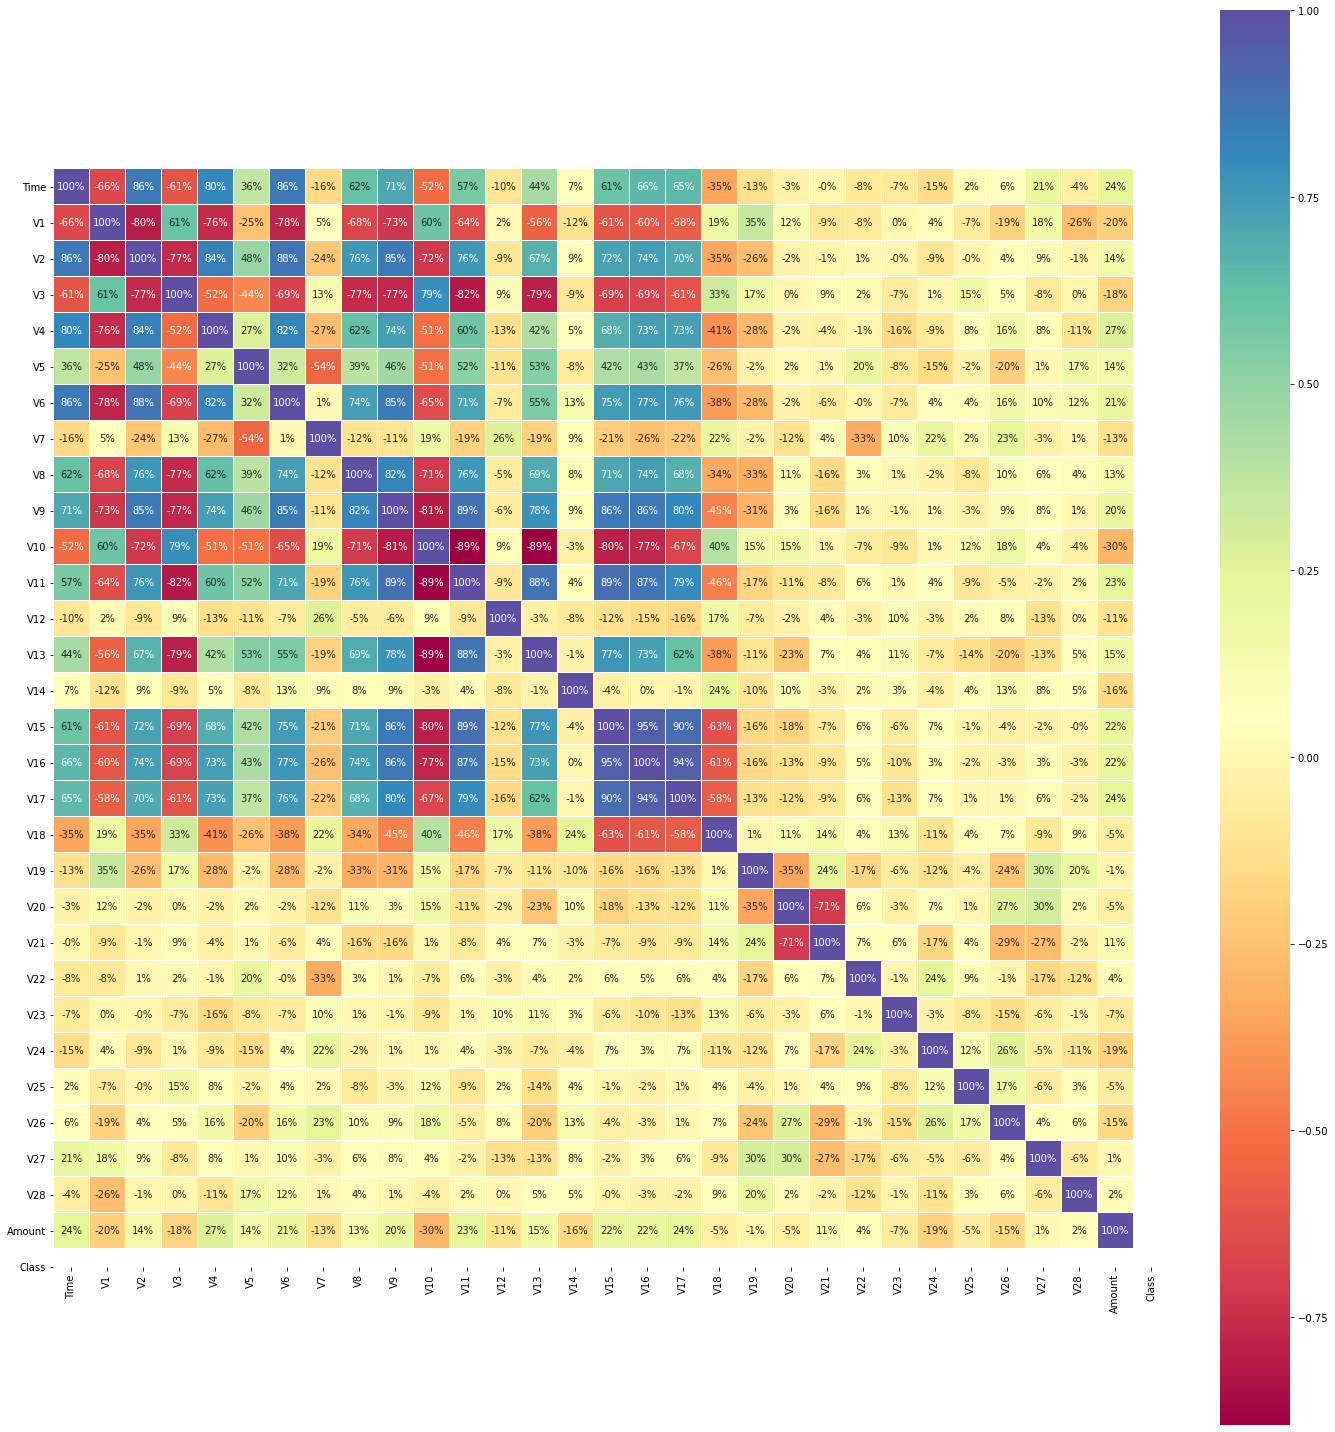

In [95]:
# criando uma matriz de correlação
corr_rus = pd.DataFrame(X_rus).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Spectral', fmt=".0%",linewidths=.1, square=True, annot=True)
plt.tight_layout()

A nova matriz de correlação mudou completamente após o balanceamento do dataset, fica claro que as variáveis tem fortes relações positivas e negativas entre si.

Agora nossos dados estão devidamente preparados para serem treinados no nosso modelo de Machine Learning.

## Modelos de Machine Learning

Faremos dois modelos de machine learning do tipo **classificação**:

* regressão logística e
* árvore de decisão

Ambos os modelos irão classificar as transações em fraude ou não fraude.



### Regressão Logística

Começaremos com o modelo de regressão logística.

Abaixo, faremos os seguintes passos:
* **escolher e importar o modelo**


In [96]:
# importando o modelo de regressão linear
from sklearn.linear_model import LogisticRegression

* **instanciar e definir os hiperparametros do modelo**



In [97]:
# instanciando o modelo
model= LogisticRegression()

* **treinar o modelo**

In [98]:
# treinando o modelo
model.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* **fazer previsões com os dados de teste**

In [99]:
# fazendo as previsões para dados de teste
y_pred=model.predict(X_test)

* **avaliar o desempenho do modelo**

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.94      0.07       123

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.52     71202
weighted avg       1.00      0.96      0.98     71202

AUC: 0.9498



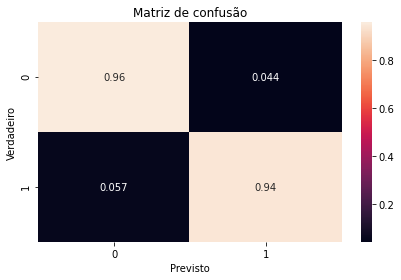

In [100]:
# imprimindo relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotando a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.tight_layout()

Obtivemos bons resultados no geral com o método de regressão logística:
* Acurácia de 96%
* Precisão, recall e f1-score com taxas interessantes
* AUC de 0.949, uma boa métrica para modelos de classificação.

De toda forma, testaremos outro modelo de classificação para fins de comparação.


### Árvore de Decisão

Vamos fazer agora o modelo de árvore de decisão (decision tree).

Abaixo, faremos os seguintes passos:

* **escolher e importar o modelo**

In [101]:
from sklearn.tree import DecisionTreeClassifier

* **instanciar e escolher os hiperparametros do modelo**

In [102]:
# instanciando o modelo
model_tree = DecisionTreeClassifier(max_depth=3)

* **treinar o modelo**

In [103]:
# treinando o modelo
model_tree.fit(X_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* **fazer previsões com os dados de teste**

In [104]:
# previsões para dados de teste
y_pred_tree=model_tree.predict(X_test)

* **avaliar o desempenho do modelo**

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.91      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.56     71202
weighted avg       1.00      0.98      0.99     71202

AUC: 0.9454



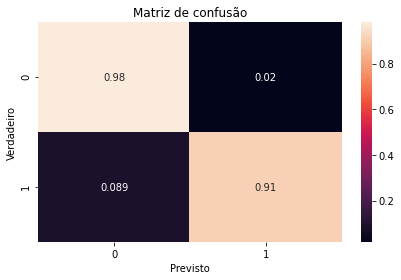

In [105]:
# imprimindo relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_tree))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

# plotando a matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_tree,  normalize='true'), annot=True, ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.tight_layout()

* plotar a árvore de decisão

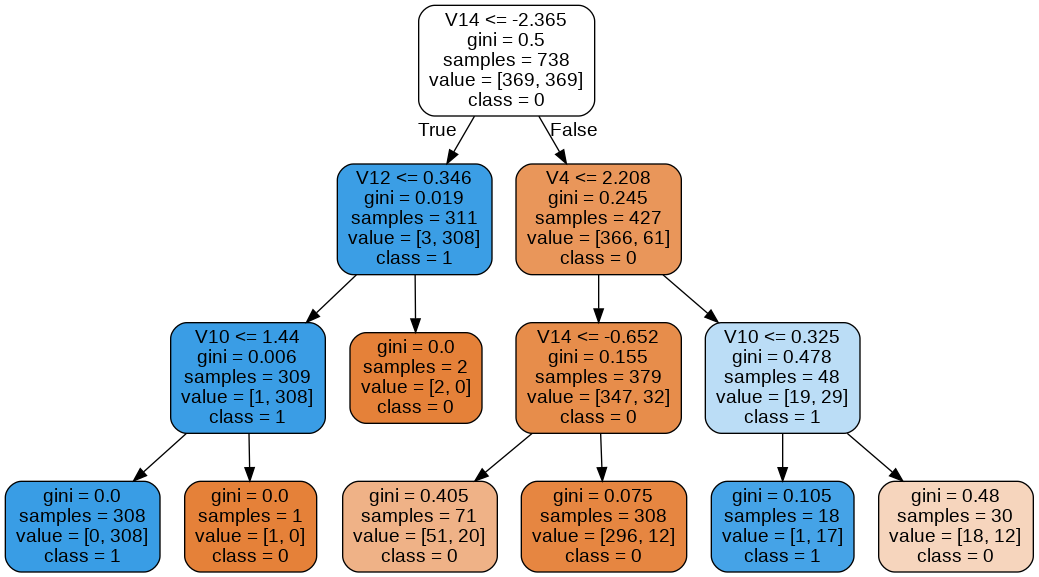

In [106]:
# plotar a árvore de decisão
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot = export_graphviz(model_tree, filled=True, rounded=True,
                    feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

Com o método de árvore de decisão, obtivemos resultados bem parecidos com o método anterior:
* Acurácia de 98%
* Precisão, recall e f1-score com taxas interessantes também
* AUC de 0.945, uma boa métrica para modelos de classificação.



## Conclusão

Após concluirmos todas as etapas de um projeto de Machine Learning , foi possível concluir que ambos os **modelos de classificação** testados nos mostraram **desempenho global** muito parecidos e **satisfatórios**.

Enquanto a acurácia de um é levemente superior, a AUC é levemente menor, e as métricas precisão e recall também sofreram pequenas alterações, fazendo dos dois modelos boas soluções para o problema em questão.

É claro que apesar do bom desempenho atingido, ainda há espaço para realizar uma validação cruzada (cross-validation) ou outro tipo de validação, que pode diminuir as chances de overfitting do modelo. Testar diferentes hiperparametros e até testar outros modelos de classificação, afim de aprimorar ainda mais o desempenho global são possibilidades também, com o objetivo final de aumentar a detecção de fraudes e assim evitá-las.




## Obrigada !
Obrigada pelo seu tempo!

Espero que tenha gostado! Se tiver qualquer dúvida, feedback ou sugestão vou adorar que você entre em contato comigo pelo [LinkedIn](https://www.linkedin.com/in/marinavillaschi/).

Para ver esse e outros projetos completos, acesse meu portfólio completo no [GitHub](https://github.com/marinavillaschi/portfolio_datascience_mpv).

Valeu!